In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
df = pd.read_csv('./raw_data/datawithcor.csv')

In [3]:
df = df.dropna(subset=['Fatality_Rate'])

In [4]:
df.head(1)

,Unnamed: 0,year,id,Date,Type,Operator,Registration,Crew,Passengers,Total,...,Total_Fatality,Total_Occupants,Fatality_Rate,Make,Index,Location.1,Add,Coor,Lat,Long
0,0,1919,1-02-AUG-1919,Saturday 2 August 1919,Caproni,Caproni,registration unknown,Fatalities: 2 / Occupants: 2,Fatalities: 12 / Occupants: 12,Fatalities: 14 / Occupants: 14,...,14,14,1.0,ca.48,1,Verona (Italy),"Verona, Veneto, Italia","45 26m 18.5849s N, 10 59m 32.6839s E",45.438496,10.992412


In [5]:
by_type = df.groupby(['Type']).sum().drop(columns=['year', 'Fatality_Rate']).reset_index()
by_type['Fatality_Rate'] = by_type['Total_Fatality'] / by_type['Total_Occupants']
by_type.head()

,Type,Unnamed: 0,Unnamed: 11,Unnamed: 12,Total_Fatality,Total_Occupants,Index,Lat,Long,Fatality_Rate
0,Aero,164239,0.0,0.0,23,65,96647,-3.668262,80.081579,0.353846
1,Aeromarine,16,0.0,0.0,4,9,10,0.000000,0.000000,0.444444
2,Airbus,4427942,0.0,0.0,3993,34972,2665075,3034.836987,3183.907070,0.114177
3,Airspeed,75684,0.0,0.0,29,262,35246,260.885018,-1.354895,0.110687
4,Alenia,139416,0.0,0.0,20,81,80059,172.000915,47.101637,0.246914


In [6]:
by_type_over_1500 = by_type[by_type['Total_Fatality'] > 1500].sort_values('Fatality_Rate',ascending = False)
by_type_over_1500

,Type,Unnamed: 0,Unnamed: 11,Unnamed: 12,Total_Fatality,Total_Occupants,Index,Lat,Long,Fatality_Rate
55,Fairchild,2312185,0.0,0.0,1987,3325,1115447,1464.448111,-436.662327,0.597594
76,Ilyushin,3239568,0.0,0.0,6084,10783,1688562,2341.529497,2783.806819,0.564221
51,Douglas,18966606,0.0,0.0,20659,37966,8638484,21013.840420,-10014.286776,0.544145
46,Curtiss,2881015,0.0,0.0,2056,3796,1302744,1908.349633,-4945.002471,0.541623
7,Antonov,14625869,0.0,0.0,6540,12714,8398189,10319.262971,13664.421401,0.514394
92,Lockheed,8918912,0.0,0.0,8614,18621,4570092,5445.596352,-4174.457457,0.462596
150,Vickers,2473217,0.0,0.0,2472,6729,1162637,3414.916905,1104.912994,0.367365
146,Tupolev,2970103,0.0,0.0,6070,16572,1645494,3402.389429,3206.746187,0.366280
48,De,10075417,0.0,0.0,3012,9147,5732861,6563.023803,-1922.487611,0.329288
45,Convair,2662625,0.0,0.0,1503,4898,1390703,1275.327886,-2742.351294,0.306860


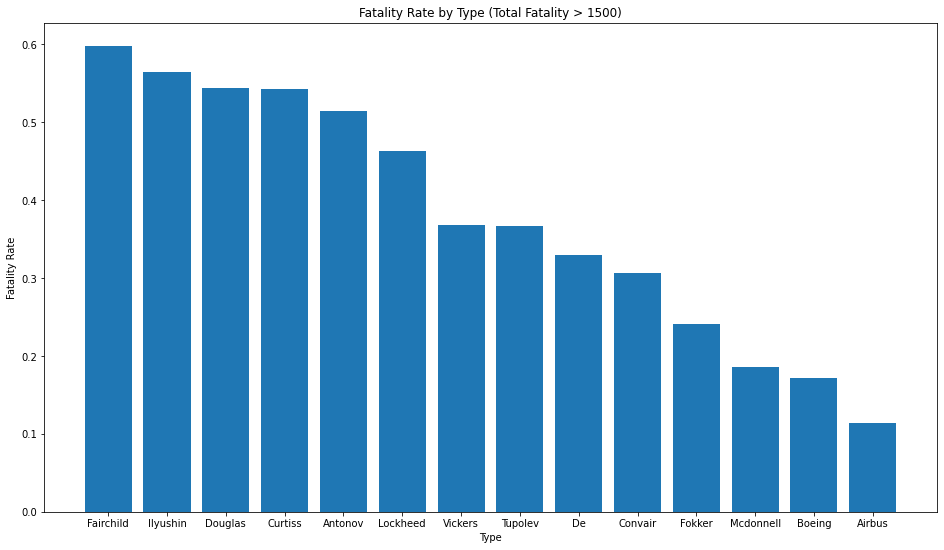

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(by_type_over_1500['Type'], by_type_over_1500['Fatality_Rate'])
ax.set_xlabel('Type')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate by Type (Total Fatality > 1500)')
plt.show()

In [8]:
by_year = df.groupby(['year']).sum().drop(columns=['Fatality_Rate']).reset_index()
by_year['Total_Survival'] = by_year['Total_Occupants'] - by_year['Total_Fatality']
by_year['Fatality_Rate'] = by_year['Total_Fatality'] / by_year['Total_Occupants']
by_year.head()

,year,Unnamed: 0,Unnamed: 11,Unnamed: 12,Total_Fatality,Total_Occupants,Index,Lat,Long,Total_Survival,Fatality_Rate
0,1919,1,0.0,0.0,15,21,3,45.438496,10.992412,6,0.714286
1,1920,11,0.0,0.0,4,20,12,107.878208,13.825043,16,0.200000
2,1921,17,0.0,0.0,2,3,13,45.951182,8.634267,1,0.666667
3,1922,28,0.0,0.0,5,9,17,100.166880,4.098468,4,0.555556
4,1923,73,0.0,0.0,11,37,48,149.959558,7.232417,26,0.297297


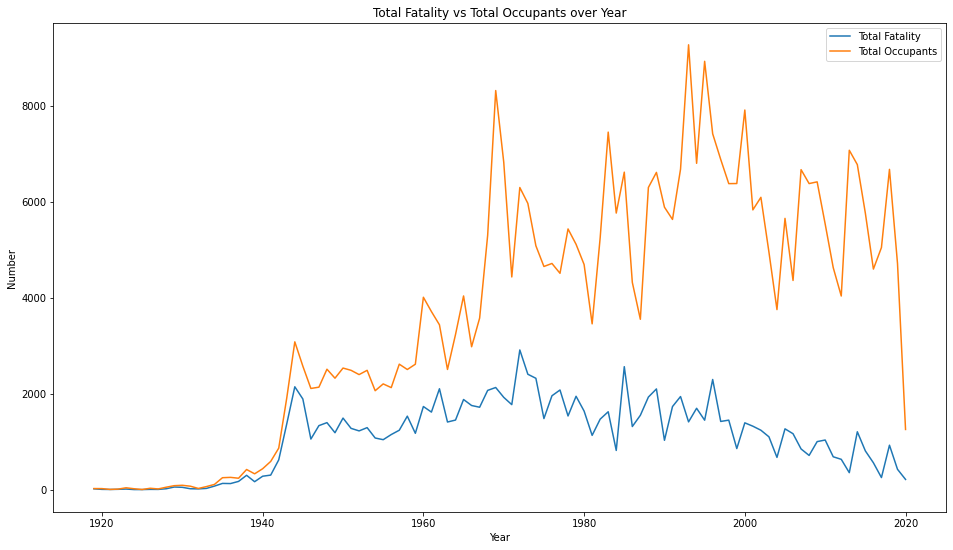

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(by_year['year'], by_year['Total_Fatality'], label='Total Fatality')
ax.plot(by_year['year'], by_year['Total_Occupants'], label='Total Occupants')
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title('Total Fatality vs Total Occupants over Year')
ax.legend()
plt.show()

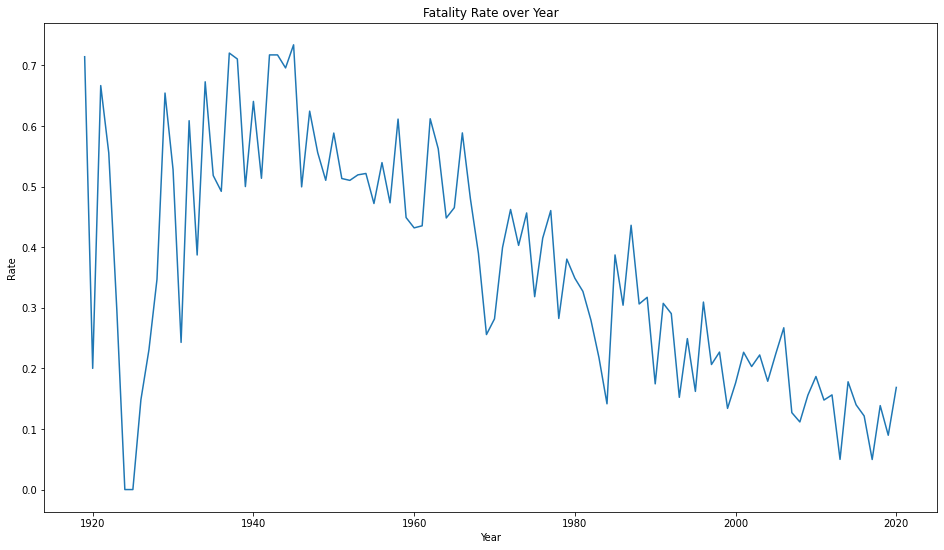

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(by_year['year'], by_year['Fatality_Rate'])
ax.set_xlabel('Year')
ax.set_ylabel('Rate')
ax.set_title('Fatality Rate over Year')
plt.show()

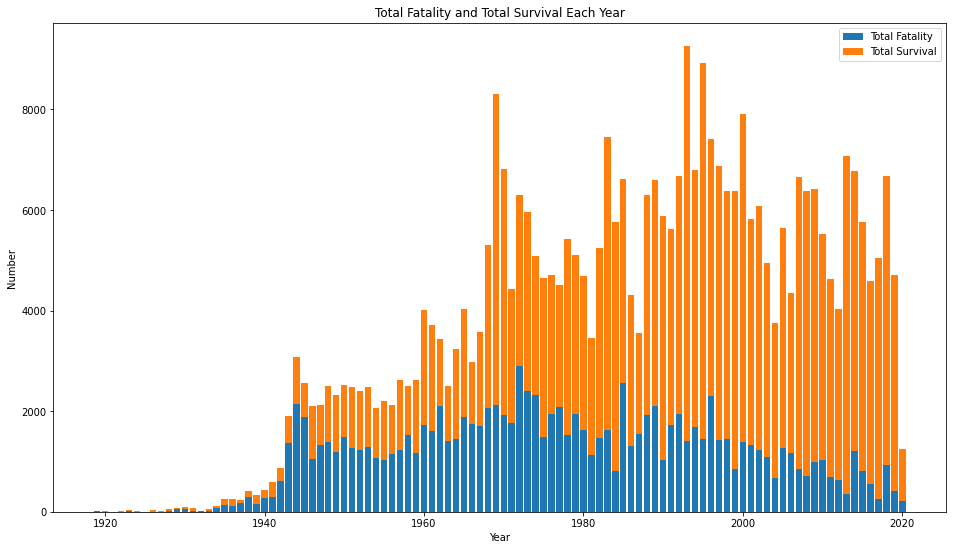

In [11]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(by_year['year'], by_year['Total_Fatality'], label='Total Fatality')
ax.bar(by_year['year'], by_year['Total_Survival'], bottom=by_year['Total_Fatality'], label='Total Survival')
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.legend()
ax.set_title('Total Fatality and Total Survival Each Year')
plt.show()

In [12]:
by_operator = df.groupby(['Operator']).sum().drop(columns=['year', 'Fatality_Rate']).reset_index()
by_operator.head(1)

,Operator,Unnamed: 0,Unnamed: 11,Unnamed: 12,Total_Fatality,Total_Occupants,Index,Lat,Long
0,2nd Arkhangelsk United Aviation Division,44167,0.0,0.0,0,24,27797,67.870106,44.15311


In [13]:
by_operator_over_1000 = by_operator[by_operator['Total_Fatality'] > 1000].sort_values('Total_Fatality',ascending = False)
by_operator_over_1000

,Operator,Unnamed: 0,Unnamed: 11,Unnamed: 12,Total_Fatality,Total_Occupants,Index,Lat,Long
4127,United States Air Force - USAF,6051265,0.0,0.0,4797,7811,2908634,4311.894988,1613.003409
4130,United States Army Air Force - USAAF,1415400,0.0,0.0,3017,4082,436792,4767.182227,3398.496582
3298,Royal Air Force - RAF,1404188,0.0,0.0,1716,2620,572223,3416.469041,1859.608046
402,Air France,831338,0.0,0.0,1631,6428,417889,1600.465197,271.975128
3023,Pan American World Airways (Pan Am),574441,0.0,0.0,1504,4532,266271,584.398111,-428.101551
4139,United States Navy,1658065,0.0,0.0,1445,2479,764809,866.698133,-516.286607
668,American Airlines,911609,0.0,0.0,1424,6870,487413,795.650907,-1910.025248
4117,United Airlines,800903,0.0,0.0,1145,5739,412887,720.152124,-1809.110770


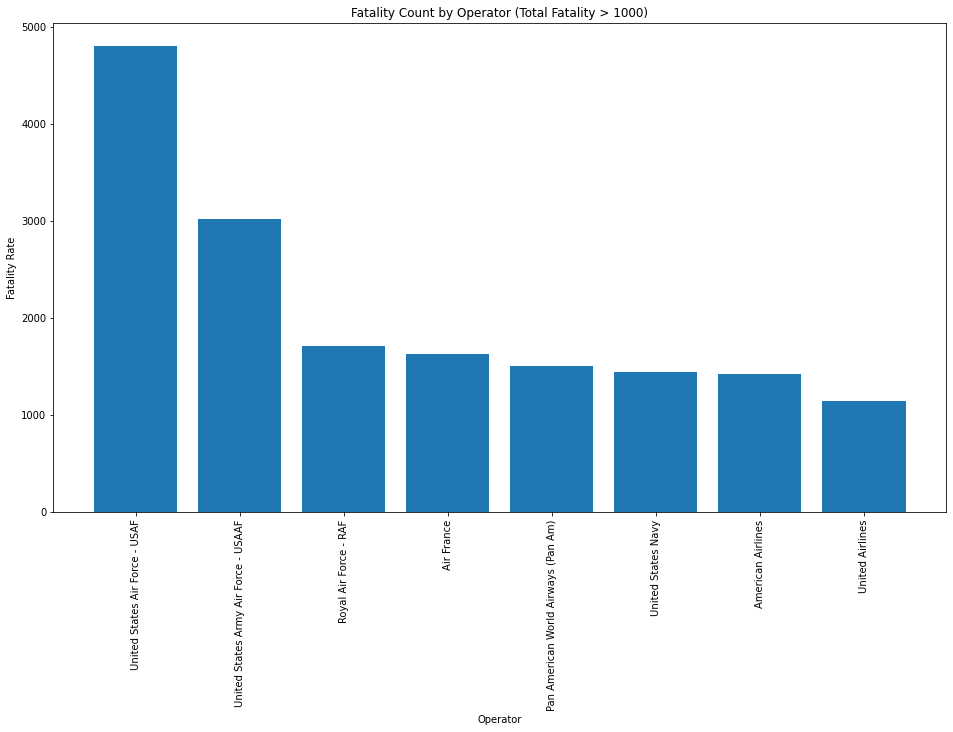

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(by_operator_over_1000['Operator'], by_operator_over_1000['Total_Fatality'])
ax.set_xlabel('Operator')
ax.set_ylabel('Fatality Rate')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_title('Fatality Count by Operator (Total Fatality > 1000)')
plt.show()

In [15]:
by_phase = df.groupby(['Phase']).sum().drop(columns=['year', 'Fatality_Rate']).reset_index()
by_phase['Fatality_Rate'] = by_phase['Total_Fatality'] / by_phase['Total_Occupants']
by_phase

,Phase,Unnamed: 0,Unnamed: 11,Unnamed: 12,Total_Fatality,Total_Occupants,Index,Lat,Long,Fatality_Rate
0,(),12532,0.0,0.0,0,2,6487,0.000000,0.000000,0.000000
1,(CMB),10707,0.0,0.0,11,12,3257,146.945572,46.359399,0.916667
2,Approach (APR),30773489,0.0,0.0,34573,56742,16571824,15602.181786,-7625.562698,0.609302
3,"Edgar Springs, MO ( United States of America)",5931,0.0,0.0,0,6,1999,0.000000,0.000000,0.000000
4,En route (ENR),51944046,0.0,0.0,56599,135025,27411340,47331.260996,-13384.071875,0.419174
5,Initial climb (ICL),12418229,0.0,0.0,10323,18272,6688080,6767.536770,-1929.300895,0.564963
6,Landing (LDG),49213185,0.0,0.0,4406,109401,28294693,28846.293104,18978.477114,0.040274
7,Maneuvering (MNV),4296040,0.0,0.0,1081,1477,2315602,4613.002050,-2840.846036,0.731889
8,Pushback / towing (PBT),735069,0.0,0.0,8,3620,449388,826.814193,-105.978889,0.002210
9,Takeoff (TOF),18782235,0.0,0.0,4953,37765,10463132,12317.606590,6344.230384,0.131153


In [16]:
by_phase_over_1000 = by_phase[by_phase['Total_Fatality'] > 1000]
by_phase_over_1000 = by_phase_over_1000.sort_values('Total_Fatality',ascending = False)

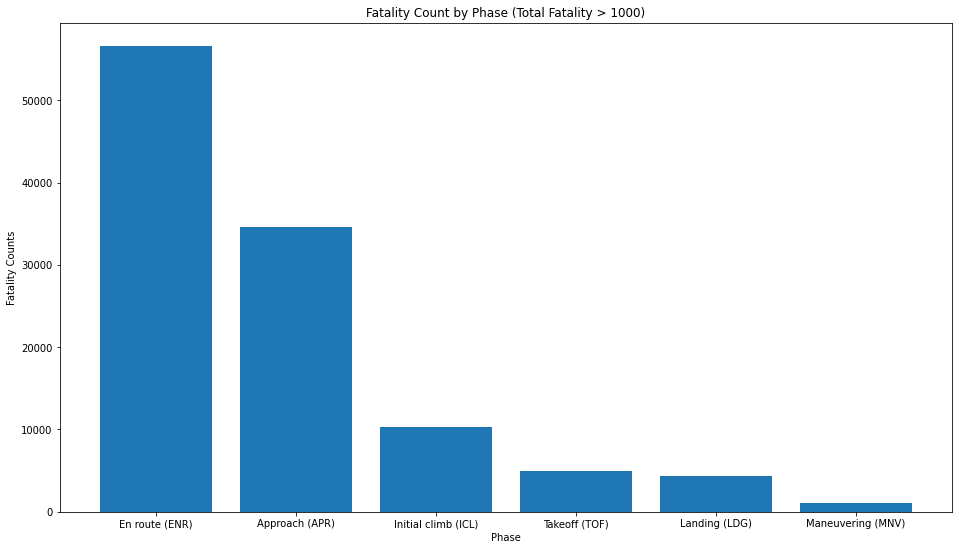

In [17]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(by_phase_over_1000['Phase'], by_phase_over_1000['Total_Fatality'])
ax.set_xlabel('Phase')
ax.set_ylabel('Fatality Counts')
ax.set_title('Fatality Count by Phase (Total Fatality > 1000)')
plt.show()

In [18]:
by_type_make = df.groupby(['Type', 'Make']).sum().drop(columns=['year', 'Fatality_Rate']).reset_index()
by_type_make['Fatality_Rate'] = by_type_make['Total_Fatality'] / by_type_make['Total_Occupants']
by_type_make.head()
by_type_make = by_type_make.sort_values('Fatality_Rate',ascending = False)

In [19]:
by_type_make_over_1000 = by_type_make[by_type_make['Total_Fatality'] > 1000]
by_type_make_over_1000

,Type,Make,Unnamed: 0,Unnamed: 11,Unnamed: 12,Total_Fatality,Total_Occupants,Index,Lat,Long,Fatality_Rate
2106,Ilyushin,il-18v,429411,0.0,0.0,1349,2222,220453,216.492454,289.274863,0.607111
1701,Douglas,dc-6b,517812,0.0,0.0,1048,1741,252765,628.420381,-1017.371659,0.601953
1417,Douglas,c-47-dl (dc-3),892093,0.0,0.0,1131,1929,373709,1153.402153,-1215.649285,0.586314
2737,Tupolev,tu-154m,544737,0.0,0.0,1589,3207,321390,529.983477,697.221775,0.495479
2473,Mcdonnell,douglas dc-9-32,817192,0.0,0.0,1355,3813,449034,498.822807,-476.274380,0.355363


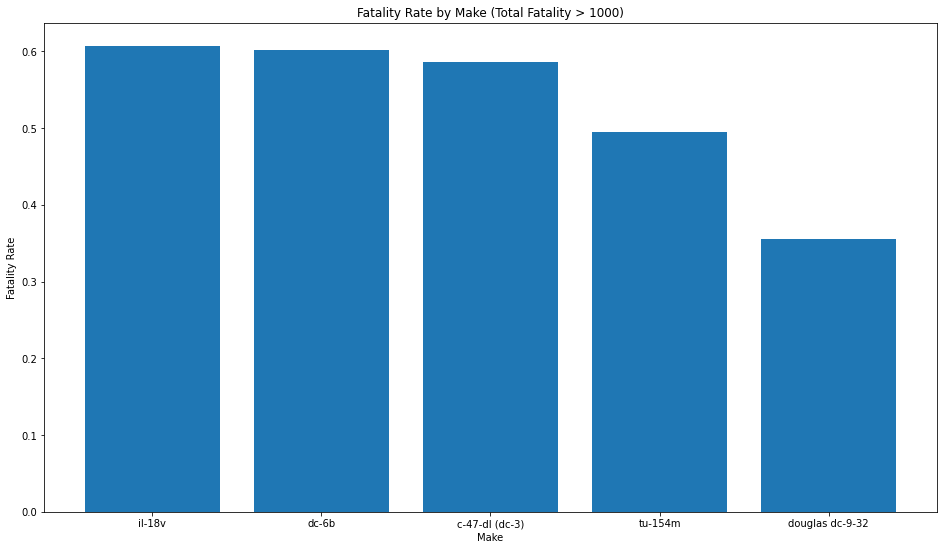

In [20]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(by_type_make_over_1000['Make'], by_type_make_over_1000['Fatality_Rate'])
ax.set_xlabel('Make')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate by Make (Total Fatality > 1000)')
plt.show()

In [21]:
by_depart_dest = df.groupby(['Departure airport', 'Destination airport']).sum().drop(columns=['year', 'Fatality_Rate']).reset_index()
by_depart_dest['Fatality_Rate'] = by_depart_dest['Total_Fatality'] / by_depart_dest['Total_Occupants']
by_depart_dest.head()

,Departure airport,Destination airport,Unnamed: 0,Unnamed: 11,Unnamed: 12,Total_Fatality,Total_Occupants,Index,Lat,Long,Fatality_Rate
0,-,-,369363,0.0,0.0,0,55,219795,113.049426,39.031182,0.000000
1,?,?,9143546,0.0,0.0,2862,6477,4717529,12859.143794,1299.043876,0.441871
2,?,"Aalborg Air Base (AAL/EKYT), Denmark",473,0.0,0.0,3,4,274,0.000000,0.000000,0.750000
3,?,Abidjan-Felix Houphouet Boigny Airport (ABJ/DI...,13143,0.0,0.0,3,3,6873,0.000000,0.000000,1.000000
4,?,"Abingdon RAF Station (ABB/EGUD), United Kingdom",7470,0.0,0.0,0,3,3018,0.000000,0.000000,0.000000


In [22]:
by_depart_dest_over_300 = by_depart_dest[by_depart_dest['Total_Fatality'] > 300].groupby('Departure airport')
by_depart_dest_over_300.sum()['Total_Fatality'].nlargest(10)

Departure airport
?                                                                2862
Tenerife-Los Rodeos International Airport (TCI/GCXO), Spain       615
Tokyo-Haneda Airport (HND/RJTT), Japan                            520
Paris-Orly Airport (ORY/LFPO), France                             346
Montreal-Mirabel International Airport, QC (YMX/CYMX), Canada     329
Bombay-Santacruz Airport (BOM/VABB), India                        325
Delhi-Indira Gandhi International Airport (DEL/VIDP), India       312
Riyadh International Airport (RUH/OERY), Saudi Arabia             301
Name: Total_Fatality, dtype: int64

In [23]:
by_type_make_over_500 = by_type_make[by_type_make['Total_Fatality'] > 500].head(10)
by_type_make_over_500

,Type,Make,Unnamed: 0,Unnamed: 11,Unnamed: 12,Total_Fatality,Total_Occupants,Index,Lat,Long,Fatality_Rate
840,Boeing,777-2h6er,43171,0.0,0.0,537,537,26976,48.148266,38.648265,1.000000
2279,Lockheed,c-130h hercules,592055,0.0,0.0,902,1112,341724,285.214714,-10.596749,0.811151
2103,Ilyushin,il-18d,212536,0.0,0.0,597,743,115019,65.155474,78.966693,0.803499
2277,Lockheed,c-130e hercules,663483,0.0,0.0,521,743,347907,591.832641,85.603866,0.701211
1477,Douglas,c-47a-90-dl (dc-3),489305,0.0,0.0,528,775,209670,865.886139,-84.945508,0.681290
2717,Tupolev,tu-104b,145683,0.0,0.0,626,971,72682,52.266796,104.375618,0.644696
1415,Douglas,c-47 (dc-3),651316,0.0,0.0,673,1065,291761,465.833655,-1453.245968,0.631925
2106,Ilyushin,il-18v,429411,0.0,0.0,1349,2222,220453,216.492454,289.274863,0.607111
1701,Douglas,dc-6b,517812,0.0,0.0,1048,1741,252765,628.420381,-1017.371659,0.601953
2224,Lisunov,li-2,701515,0.0,0.0,651,1101,277445,1558.692086,2099.942991,0.591281


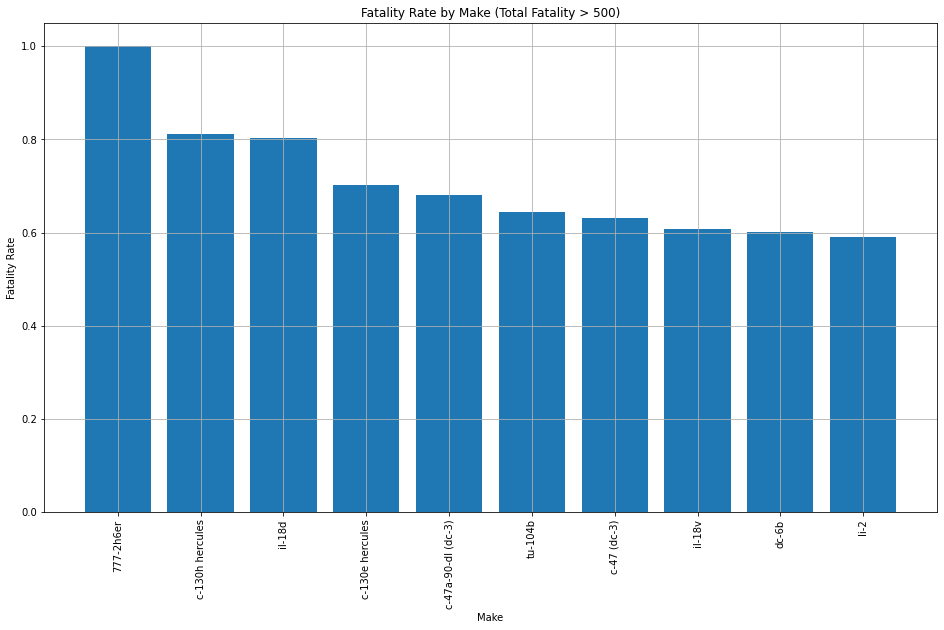

In [24]:
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(by_type_make_over_500['Make'], by_type_make_over_500['Fatality_Rate'])
ax.grid(visible = True)
ax.set_xlabel('Make')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate by Make (Total Fatality > 500)')
plt.xticks(rotation = 90)
plt.show()

In [25]:
Temp = df.copy()
a = Temp[Temp['Nature']=='Military'].shape[0]
a/Temp.shape[0]
#Temp = Temp.groupby('isMilitary')[['isMilitary']].count()


0.19388619388619388

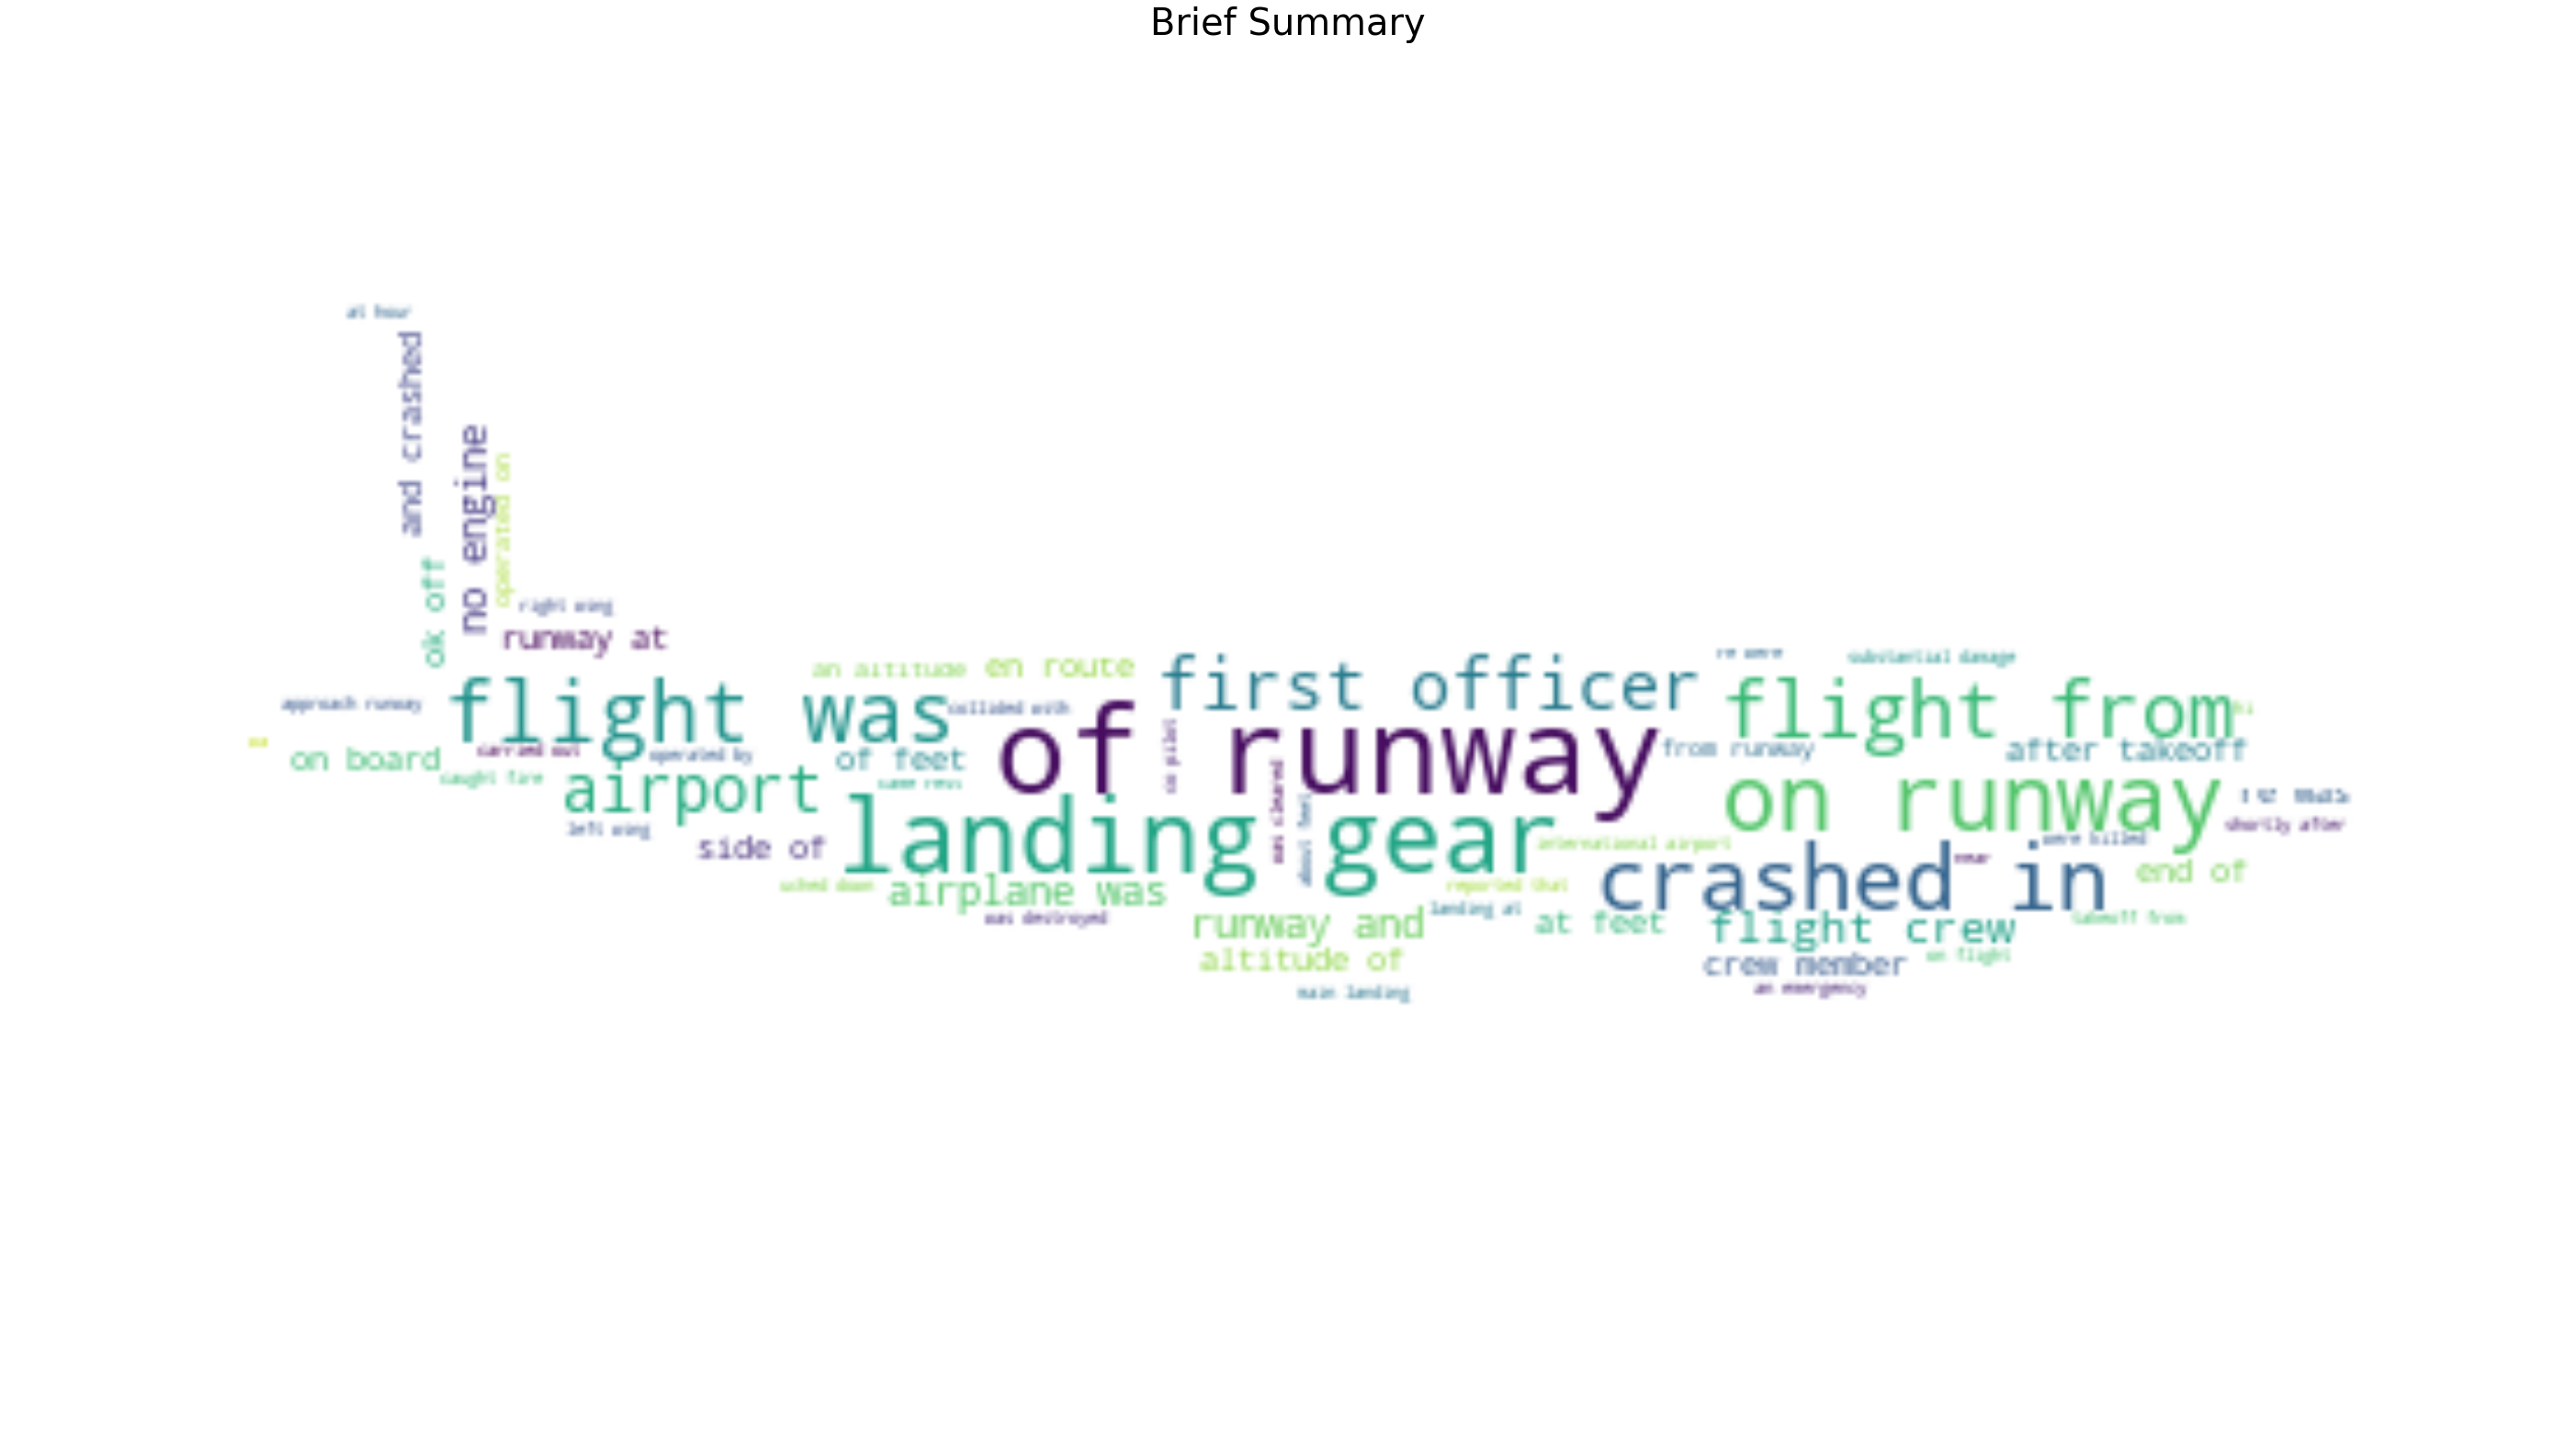

In [26]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.Narrative.tolist()).lower()
text = text.replace('The','')
text = text.replace('the','')
text = text.replace('to','')
plane_mask = np.array(Image.open('download.jpg'))
stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('of')
#stopwords.add('The')
wc = WordCloud(background_color="white",width = 1600,height = 1400, max_words=2000, mask = plane_mask,
               stopwords=stopwords,mode = 'RGB',random_state = 25)
wc.generate(text)

plt.figure(figsize = (50,50))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=40)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()


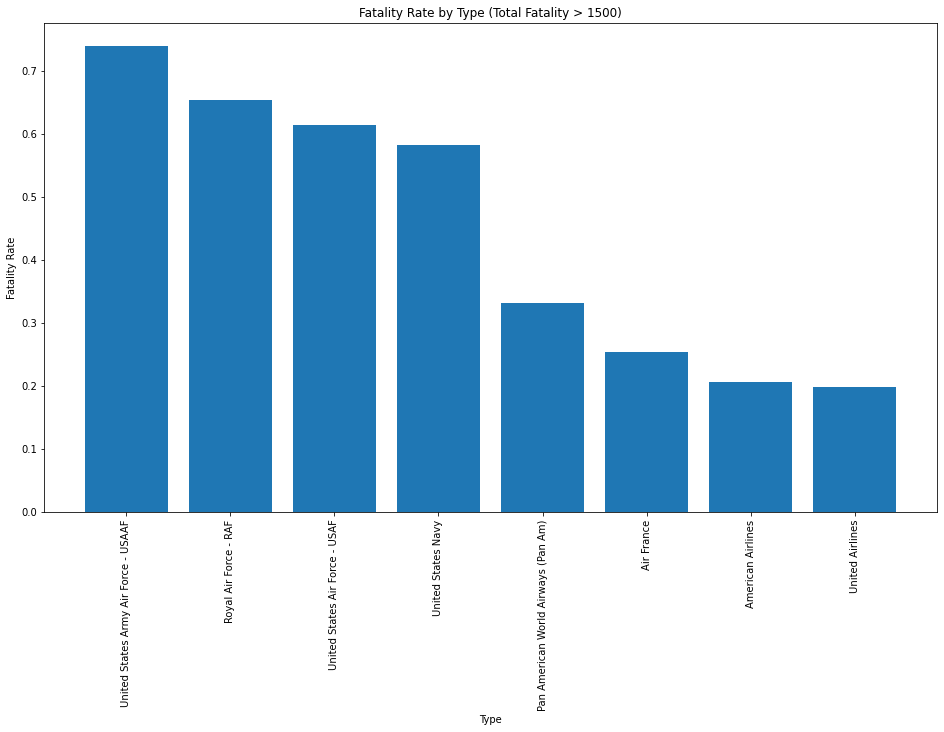

In [27]:
by_type = df.groupby(['Operator']).sum().drop(columns=['year', 'Fatality_Rate']).reset_index()
by_type['Fatality_Rate'] = by_type['Total_Fatality'] / by_type['Total_Occupants']
by_type.head()
by_type_over_1500 = by_type[by_type['Total_Fatality'] > 1000].sort_values('Fatality_Rate',ascending = False)
by_type_over_1500
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(by_type_over_1500['Operator'], by_type_over_1500['Fatality_Rate'])
ax.set_xlabel('Type')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate by Type (Total Fatality > 1500)')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

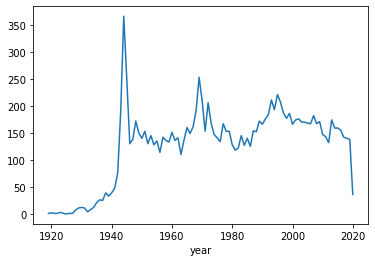

In [28]:
#Year Accident Distribution
df.groupby('year').count()['id'].plot()

In [32]:
df.head(1)

,Unnamed: 0,year,id,Date,Type,Operator,Registration,Crew,Passengers,Total,...,Total_Fatality,Total_Occupants,Fatality_Rate,Make,Index,Location.1,Add,Coor,Lat,Long
0,0,1919,1-02-AUG-1919,Saturday 2 August 1919,Caproni,Caproni,registration unknown,Fatalities: 2 / Occupants: 2,Fatalities: 12 / Occupants: 12,Fatalities: 14 / Occupants: 14,...,14,14,1.0,ca.48,1,Verona (Italy),"Verona, Veneto, Italia","45 26m 18.5849s N, 10 59m 32.6839s E",45.438496,10.992412


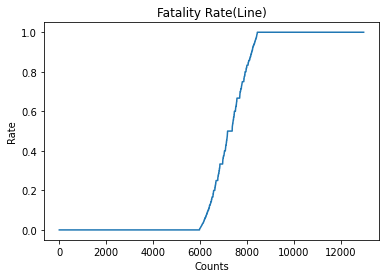

In [30]:
plt.plot(sorted(df['Fatality_Rate']))
plt.title('Fatality Rate(Line)',fontsize = 12)
plt.xlabel('Counts',fontsize = 10)
plt.ylabel('Rate',fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

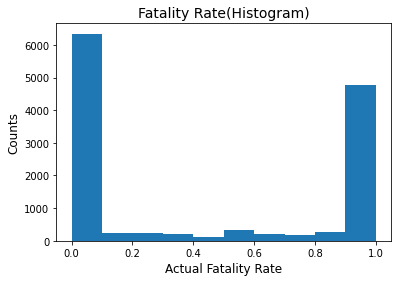

In [31]:
plt.hist(sorted(df['Fatality_Rate']))
plt.title('Fatality Rate(Histogram)',fontsize = 14)
plt.xlabel('Actual Fatality Rate',fontsize = 12)
plt.ylabel('Counts',fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)